In [51]:
# python libraries
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.figsize": [16, 10],
    "font.size": 18,
})
from scipy.fft import rfft, rfftfreq, irfft
# from numpy.fft import rfft, rfftfreq
# from torch.fft import rfft, rfftfreq

# data

In [40]:
data_step = 0.001
t = np.arange(start = 0, stop = 1, step = data_step)

# 正弦波序列
freq_50_series = np.sin(2 * np.pi * 50 * t)
freq_120_series = np.sin(2 * np.pi * 120 * t)
# 正弦波序列组合
f_clean = freq_50_series + freq_120_series

# 噪声数据
noise_series = 2.5 * np.random.randn(len(t))
# 噪声污染序列
f_noise = f_clean + noise_series

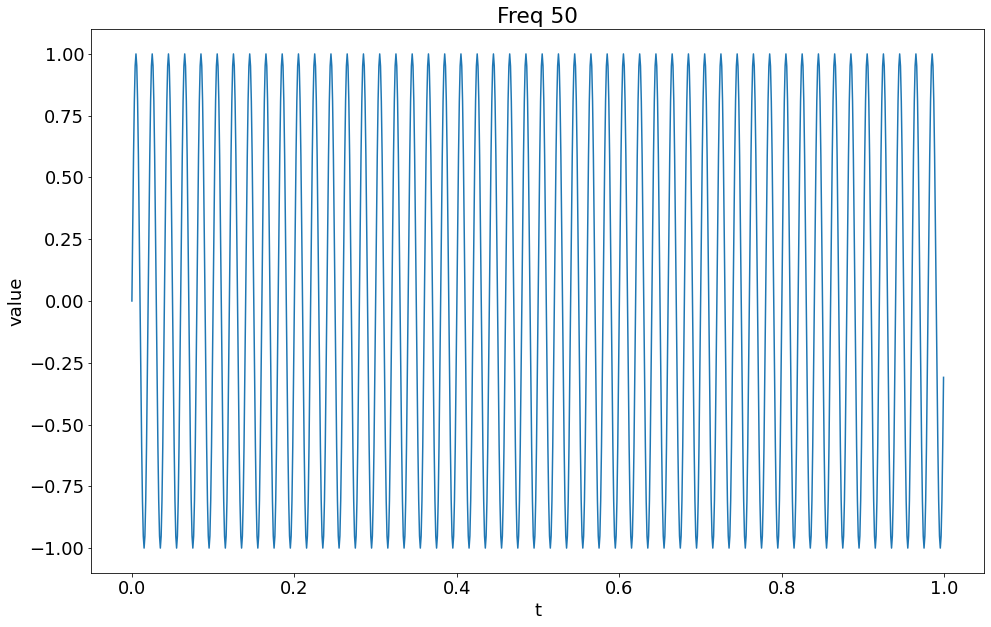

In [38]:
plt.plot(t, freq_50_series)
plt.title("Freq 50")
plt.xlabel("t")
plt.ylabel("value")
plt.show()

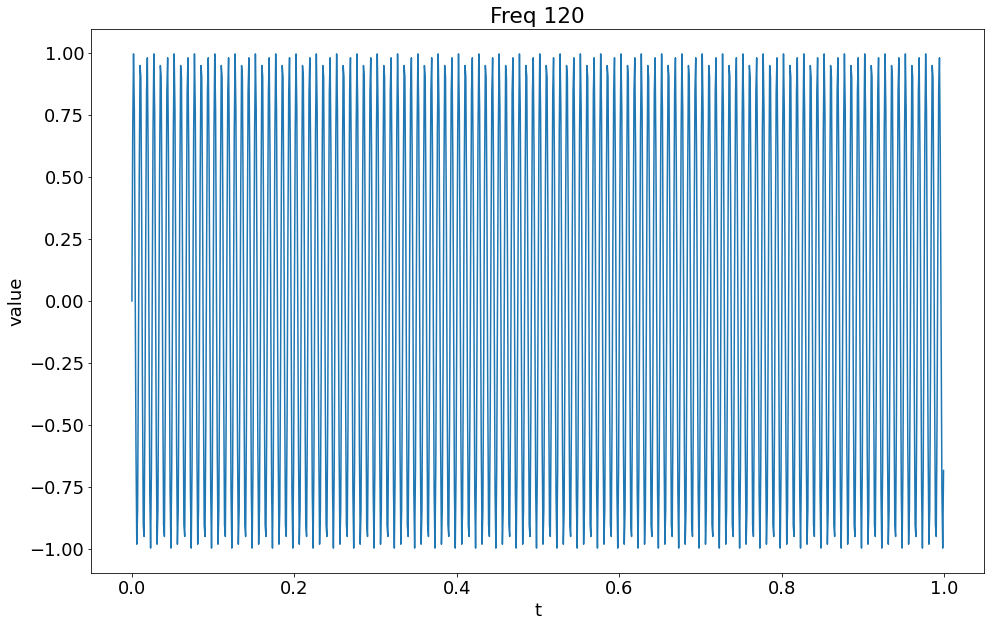

In [37]:
plt.plot(t, freq_120_series)
plt.title("Freq 120")
plt.xlabel("t")
plt.ylabel("value")
plt.show()

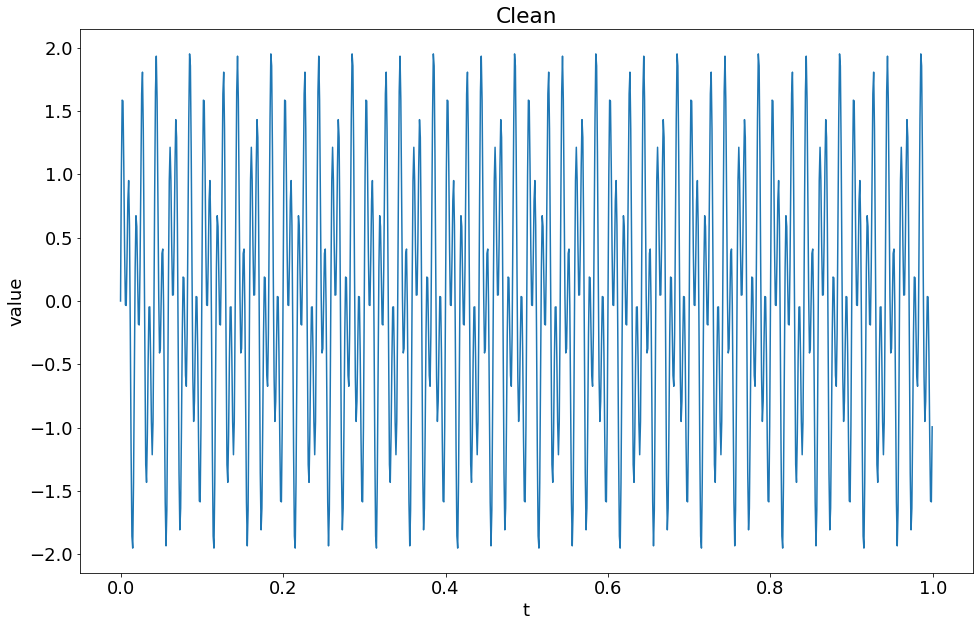

In [36]:
plt.plot(t, f_clean, label = "Clean")
plt.title("Clean")
plt.xlabel("t")
plt.ylabel("value")
plt.show()

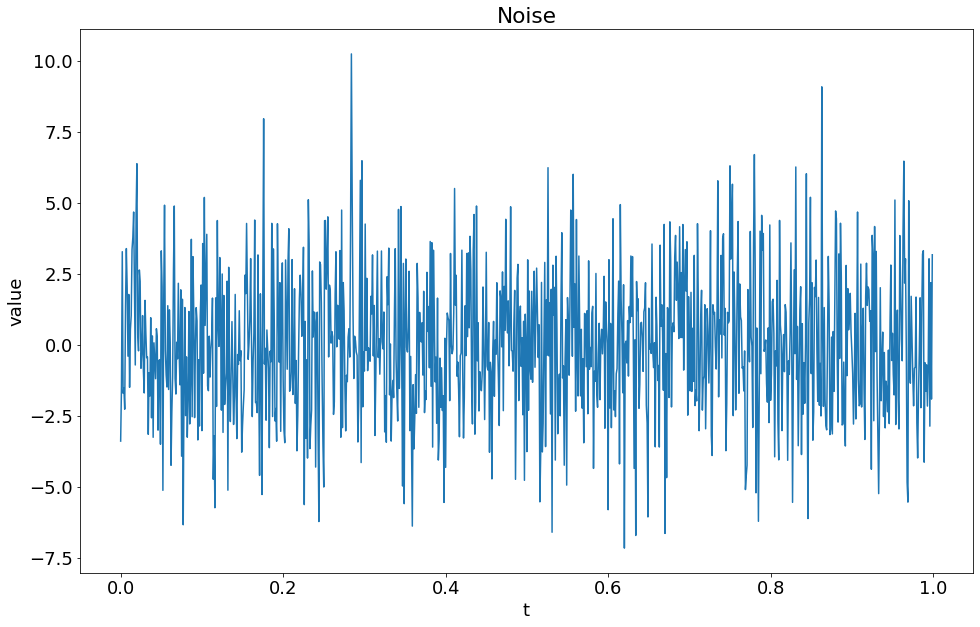

In [35]:
plt.plot(t, noise_series)
plt.title("Noise")
plt.xlabel("t")
plt.ylabel("value")
plt.show()

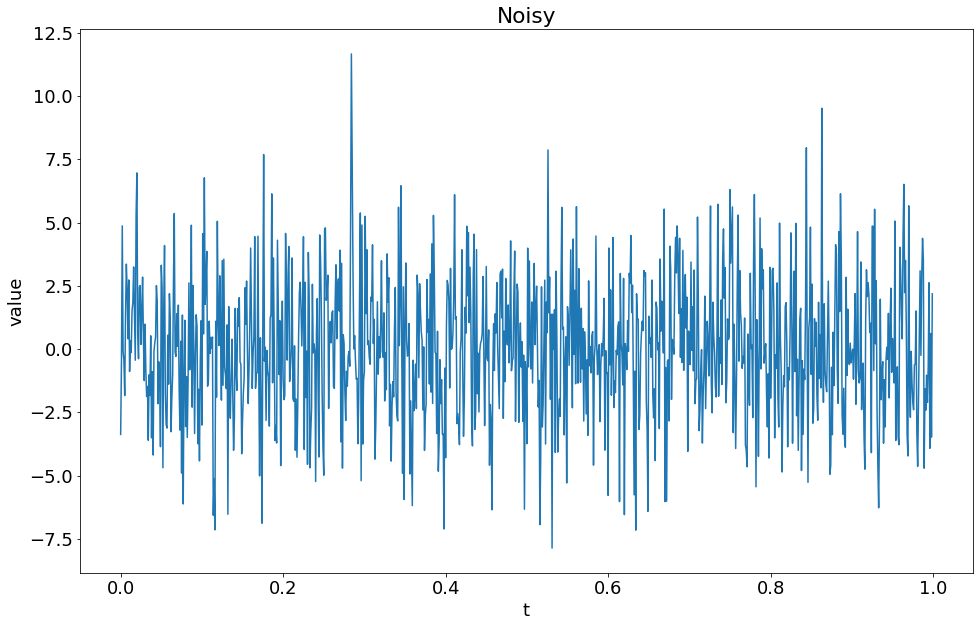

In [34]:
plt.plot(t, f_noise)
plt.title("Noisy")
plt.xlabel("t")
plt.ylabel("value")
plt.show()

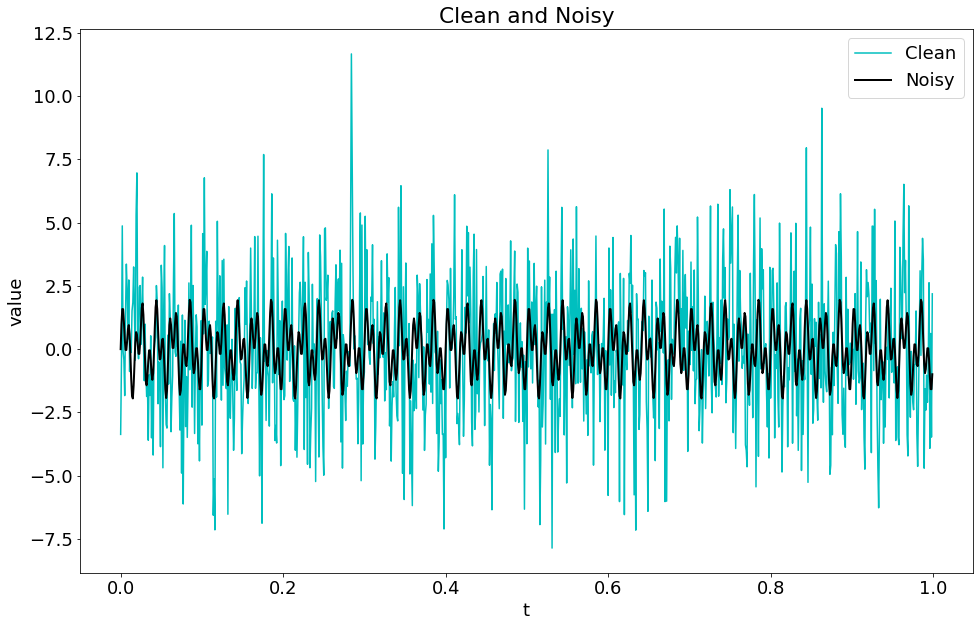

In [39]:
plt.plot(t, f_noise, c = "c", linewidth = 1.5, label = "Clean")
plt.plot(t, f_clean, c = "k", linewidth = 2, label = "Noisy")
plt.xlabel("t")
plt.ylabel("value")
plt.title("Clean and Noisy")
plt.legend()
plt.show()

# FFT

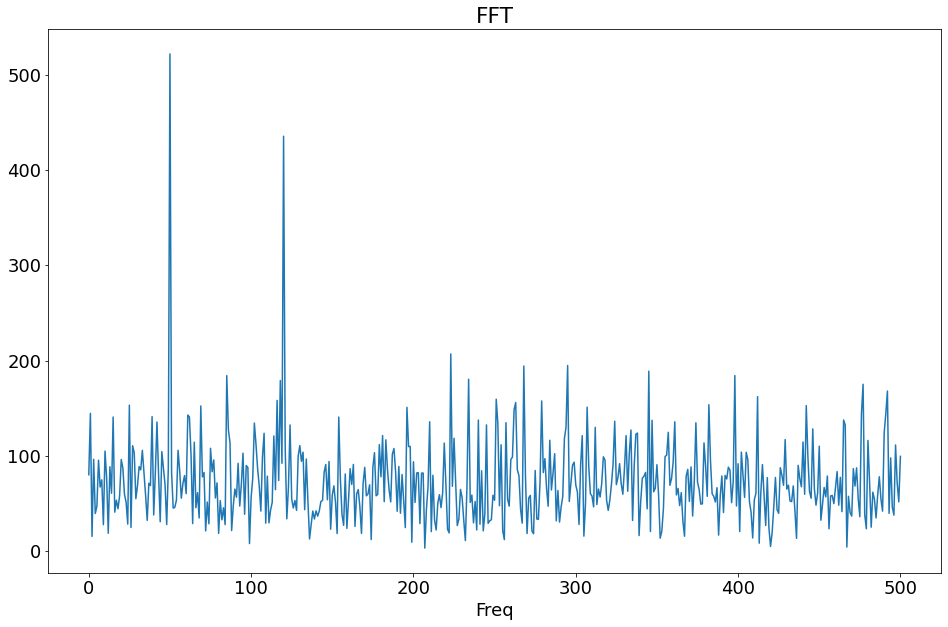

In [49]:
n = len(t)

yf = rfft(f_noise)
yf_abs = np.abs(yf)
xf = rfftfreq(n, data_step)

plt.plot(xf, yf_abs)
plt.xlabel("Freq")
plt.title("FFT")
plt.show()

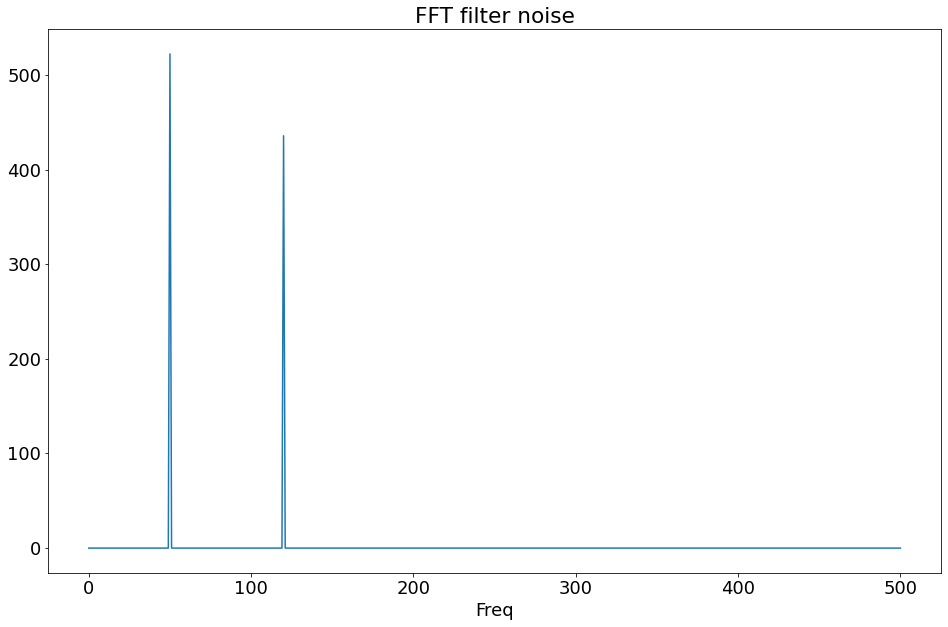

In [50]:
yf_clean = (yf_abs > 300) * yf
yf_clean_abs = np.abs(yf_clean)

plt.plot(xf, yf_clean_abs)
plt.xlabel("Freq")
plt.title("FFT filter noise")
plt.show()

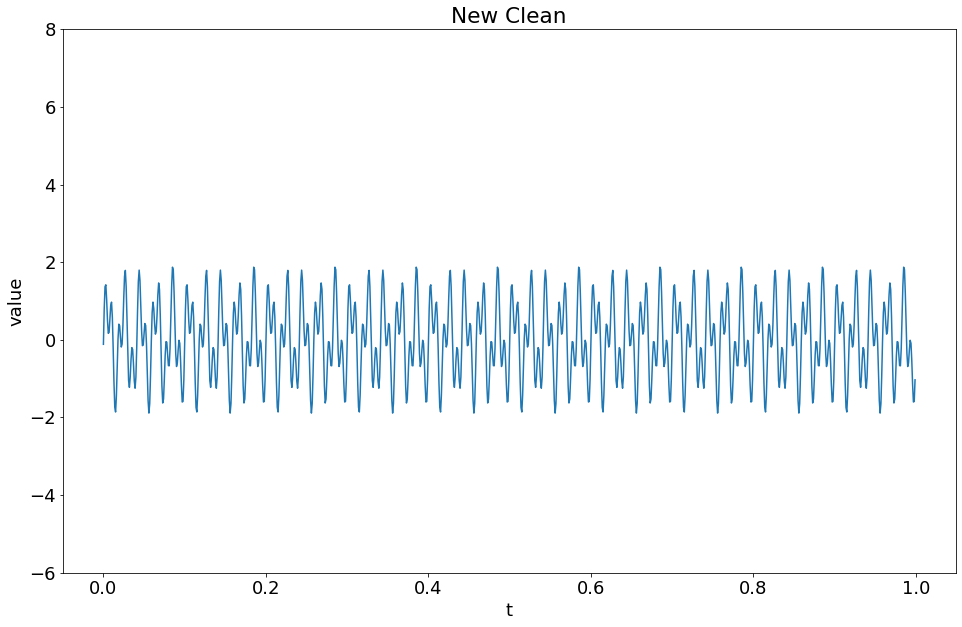

In [52]:
new_f_clean = irfft(yf_clean)

plt.plot(t, new_f_clean)
plt.title("New Clean")
plt.xlabel("t")
plt.ylabel("value")
plt.ylim(-6, 8)
plt.show()